In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath
sympy.init_printing()

In [2]:
def f(x):
    return np.exp(-x**2)

val, err = integrate.quad(f, -1, 1)
val, err

In [3]:
# having parameters in integrand
def f(x, a, b, c):
    return a * np.exp(-((x - b)/c)**2)
val, err = integrate.quad(f, -1, 1, args=(1,2,3))
val, err

In [4]:
f = lambda x: np.exp(-x**2)
val, err = integrate.quad(f, -np.inf, np.inf)
val, err

Singularities
---

Integrating $\int_{-1}^{1} \frac{1}{\sqrt{|x|}} dx$:

In [5]:
f =  lambda x: 1/np.sqrt(abs(x))
a, b = -1, 1
integrate.quad(f, a, b)

<ipython-input-5-50838dabcd45>:1: RuntimeWarning: divide by zero encountered in double_scalars
  f =  lambda x: 1/np.sqrt(abs(x))


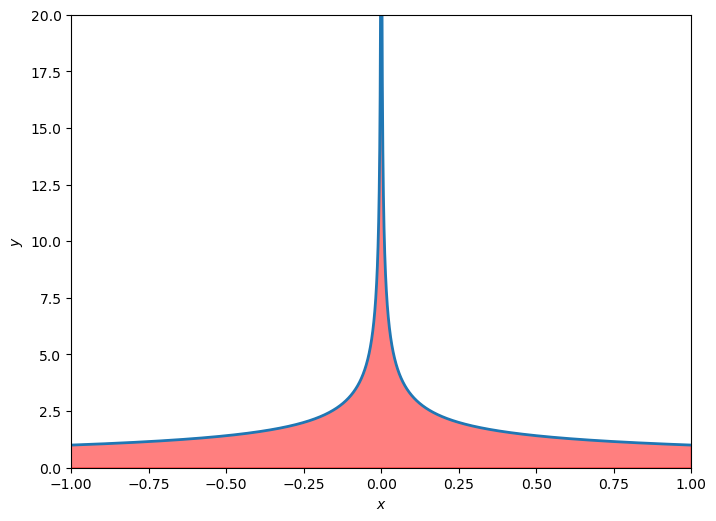

In [10]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
x = np.linspace(a,b,10000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color="red", alpha=0.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_ylim([0,20])
ax.set_xlim([-1,1])

In [11]:
# using points arg to avoid diverging points
integrate.quad(f, a, b, points=[0])

Tabulated integrand
---

example: integrating $\int_0^2 \sqrt x$ using 25 sampling points

Text(0, 0.5, '$f(x)$')

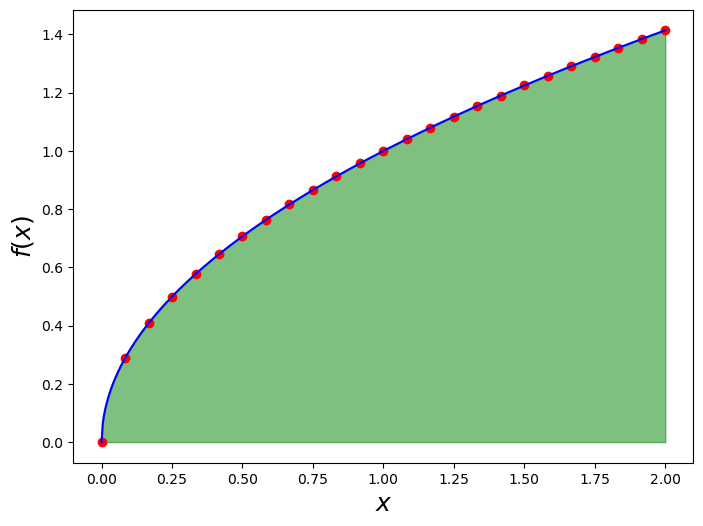

In [13]:
f = lambda x: np.sqrt(x)
a, b = 0, 2
x = np.linspace(a, b, 25)
y = f(x)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
ax.plot(x, y, 'ro')
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)

In [14]:
val_trapz = integrate.trapz(y, x)
val_simps = integrate.simps(y, x)
val_trapz, val_simps